#Пример распознавания изображений из набора данных cifar10. Идентификация вашего изображения

---


Пример распознавания изображений из набора данных cifar10, идентификация своего изображения


Чтобы запускать и редактировать код, сохраните копию этого ноутбука на свой диск (File->Save a copy in Drive...).

More details:
https://keras.io/api/datasets/

https://keras.io/api/datasets/cifar10/

https://www.tensorflow.org/datasets/catalog/cifar10?hl=en






##Набор данных CIFAR-10

Набор данных CIFAR-10 состоит из 60000 цветных изображений 32х32 в 10 классах, по 6000 изображений в каждом классе. Имеется 50000 обучающих изображений и 10000 тестовых изображений.

Набор данных разделен на пять обучающих пакетов и один тестовый пакет, каждый из которых содержит 10000 изображений. Тестовый пакет содержит ровно 1000 случайно выбранных изображений из каждого класса. Обучающие пакеты содержат оставшиеся изображения в случайном порядке, но некоторые обучающие пакеты могут содержать больше изображений из одного класса, чем из другого. В общей сложности обучающие пакеты содержат ровно 5000 изображений из каждого класса.



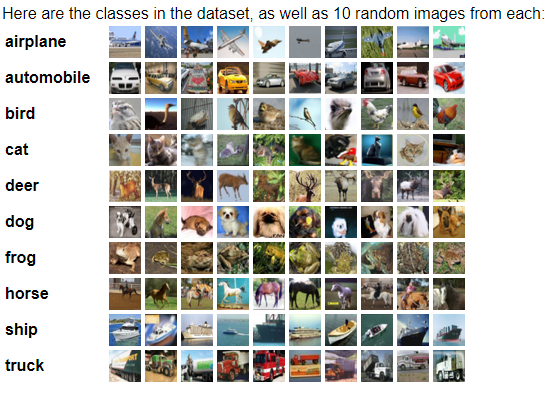

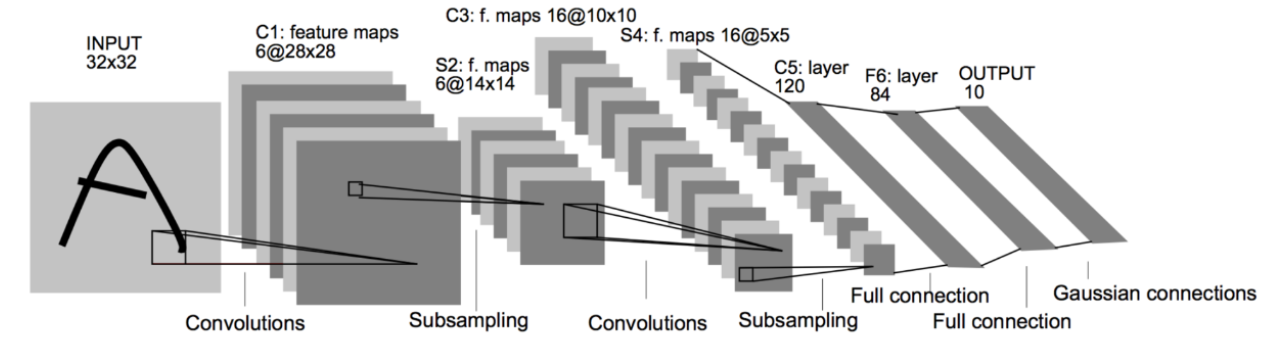

ImageNet Classification with Deep Convolutional Neural Networks (2012)


http://www.cs.toronto.edu/~fritz/absps/imagenet.pdf

https://habr.com/ru/company/mailru/blog/311706/

###шаг 1. Вспомогательные библиотеки и Tensorflow.Keras

1 шаг.  Загружаем необходимые ресурсы Tensorflow.Keras

Искусственная нейронная сеть создана с использованием ресурсов библиотеки Keras.

In [ ]:
#from tensorflow.keras.datasets import mnist
#from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np # линейная алгебра
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

### шаг 2. Импортируйте набор данных

In [ ]:
# Импортируем датасет
#(x_train_init, y_train_init), (x_test_init, y_test_init) = fashion_mnist.load_data()
(x_train_init, y_train_init), (x_test_init, y_test_init) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


**Изучите полученные данные**

Посмотрим на данные

In [ ]:
x_train_init.shape

(50000, 32, 32, 3)

In [ ]:
len(x_train_init)

50000

In [ ]:
x_train_init

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

**Нормализация данных, стандартизация функций**

Нормализация данных

Измените эти значения в диапазоне от 0 до 1, прежде чем вводить их в модель нейронной сети. Для этого разделите значения на 255. Важно, чтобы обучающий набор и тестовый набор были предварительно обработаны одинаковым образом:

In [ ]:
# Применяется к каждому элементу массива в отдельности
x_train = x_train_init.astype('float32')
x_train = x_train_init / 255
x_test = x_test_init.astype('float32')
x_test = x_test_init / 255

In [ ]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
len(x_test)

10000

##3 шаг. Визуализация данных

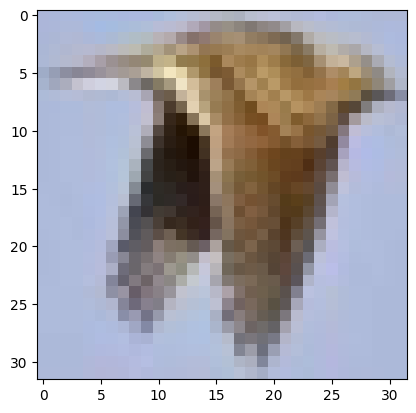

In [ ]:
n = 123
plt.imshow(Image.fromarray(x_train_init[n]).convert('RGBA'))
plt.show()

In [ ]:
# Список классов с названиями
#classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel boot'] # fashionMnist
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

[6] [9] [9] [4] [1] [1] [2] [7] [8] [3] 

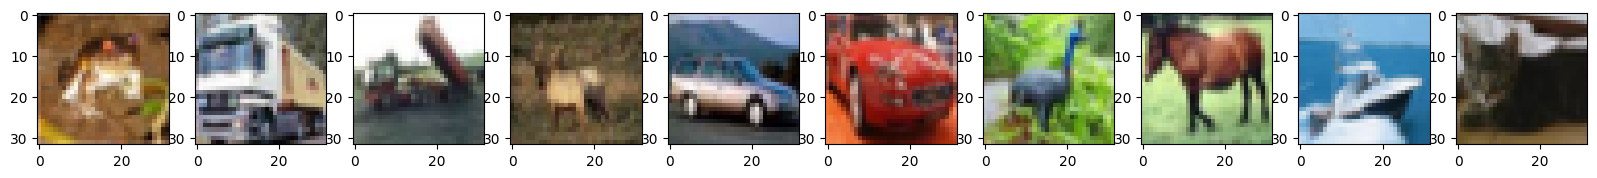

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train_init[i])
    print(y_train_init[i], end=' ')

##шаг 4. Предварительно обработайте данные

**Преобразование размерности данных в наборе**

Преобразуем форму массива в (1, 3072) (32 x 32 x 3)


Преобразуйте формат изображений из двумерного массива (размером 32 на 32 пикселя) в одномерный массив (размером 32 * 32 * 3 пикселей).

In [ ]:
32*32*3

3072

In [ ]:
#x_train = x_train.reshape(-1, 3072)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train = x_train.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)

In [ ]:
x_train.shape

(50000, 3072)

##шаг 5. Преобразуйте надписи в one hot encoding

Каждая метка представляет собой целое число в диапазоне от 0 до 9:

In [ ]:
y_test_init

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
print(y_test_init[n])

[2]


- Во многих приложениях удобно преобразовывать категориальные (нечисловые) признаки в числовые переменные.

- Например, цифра категориального признака со значением d в [0-9] может быть закодирована в двоичный вектор с 10 позициями, который всегда имеет значение 0, за исключением d-й позиции, где присутствует 1.
- - Этот тип представления называется **one-hot encoding (OHE)** и очень распространен в интеллектуальном анализе данных, когда обучающий алгоритм специализируется на работе с числовыми функциями.

Преобразуем метки в формат one hot encoding

In [ ]:
y_train = utils.to_categorical(y_train_init, 10)
y_test = utils.to_categorical(y_test_init, 10)


**One hot encoding label**

**Правильный ответ в формате one hot encoding**

Например, для цифры 2: [0,0,1,0,0,0,0,0,0,0].



In [ ]:
print(y_test[n])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


##шаг 6. Создайте модель

Создаем нейронную сеть

**Создаем последовательную модель**

##Однослойная модель
**Модель нейронной сети с одним слоем**


Создаем слой, состоящий из 10 нейронов, в котором каждый нейрон связан со всеми входами = 3072 (32x32x3) в каждый нейрон.

- Исходным строительным блоком Keras является модель, а простейшая модель называется последовательной.

- Последовательная модель Keras представляет собой линейный конвейер (стек) слоев нейронных сетей.

- Сеть плотная, что означает, что каждый нейрон в слое связан со всеми нейронами, расположенными в предыдущем слое, и со всеми нейронами в следующем слое.

- Этот код определяет один слой с 10 нейронами и ожидает 3072 входных переменных (также известных как функции).
- Входной слой содержит нейрон, связанный с каждым пикселем изображения, в общей сложности 32 x 32 x 3 = 3072 нейрона, по одному на каждый пиксель в изображениях cifar10.

In [ ]:
model_Dense_1 = Sequential()
model_Dense_1.add(Dense(10, input_dim=3072, activation='softmax'))

print(model_Dense_1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30730     
                                                                 
Total params: 30730 (120.04 KB)
Trainable params: 30730 (120.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
print('Trainable params:', (3072 + 1)*10) # 1 is a bias (b)

Trainable params: 30730


##Шаг №7. Скомпилируйте модель

Прежде чем модель будет готова к обучению, необходимо выполнить еще несколько настроек. Они добавляются на этапе компиляции модели:

- Функция потери данных — определяет, насколько точна модель во время обучения. Вы хотите минимизировать эту функцию, чтобы "направить" модель в нужном направлении.
- Оптимизатор — это способ обновления модели на основе данных, которые она видит, и ее функции потерь.
- Метрики — используются для мониторинга этапов обучения и тестирования. В следующем примере используется точность, доля изображений, которые правильно классифицированы.

In [ ]:
# компелируем модель
model_Dense_1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Компилируем модель, это значит задаем:

* функцию ошибки loss="categorical_crossentropy": определяет насколько сильно отличается значение, выданное нейронной сетью от правильного ответа
* оптимизатор: реализует оптимизационный алгоритм для обновления весовых коэффициентов и уменьшения ошибки
* метрику качества metrics=["accuracy"]: определяет долю правильных ответов

#№Шаг №8. Обучите модель

Чтобы начать обучение, вызовите model.model.fit — называется так потому, что он "подгоняет" модель к данным обучения.:

In [ ]:
# обучаем модель
history = model_Dense_1.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.2, verbose=2)

Epoch 1/5
313/313 - 4s - loss: 1.9432 - accuracy: 0.3109 - val_loss: 1.8355 - val_accuracy: 0.3533 - 4s/epoch - 11ms/step
Epoch 2/5
313/313 - 1s - loss: 1.8238 - accuracy: 0.3615 - val_loss: 1.8324 - val_accuracy: 0.3564 - 1s/epoch - 4ms/step
Epoch 3/5
313/313 - 1s - loss: 1.8059 - accuracy: 0.3717 - val_loss: 1.7907 - val_accuracy: 0.3839 - 1s/epoch - 3ms/step
Epoch 4/5
313/313 - 1s - loss: 1.7807 - accuracy: 0.3799 - val_loss: 1.9220 - val_accuracy: 0.3525 - 1s/epoch - 4ms/step
Epoch 5/5
313/313 - 1s - loss: 1.7749 - accuracy: 0.3815 - val_loss: 1.7966 - val_accuracy: 0.3839 - 1s/epoch - 4ms/step


По мере обучения модели отображаются показатели потерь и точности.

Эта модель достигает точности около 0,4 (или 40%) по данным обучения.

Проверяем качество обучения на тестовом наборе данных.

Используем метод evaluate, указываем тестовый набор данных x_test и правильные ответы y_test

##Шаг №9. Оцените точность

Затем сравните, как работает модель в тестовом наборе данных:

In [ ]:
scores = model_Dense_1.evaluate(x_test, y_test, verbose=0)
print('\033[91m', "Однослойная модель правильно распознала", round(scores[1] * 100, 4), "% корректных изображений")

 Однослойная модель правильно распознала 38.52 % корректных изображений


#Шаг #10. Улучшаем простую сетку в Keras с помощью скрытого слоя

- У нас есть базовая точность в 37% при обучении, 39% при валидации и 37% при тестировании. Это не лучшая отправная точка, но мы, безусловно, можем ее улучшить. Давайте посмотрим, как это сделать.

- Первое улучшение заключается в добавлении дополнительного слоя к нашей сети.
Итак, после входного слоя у нас есть первый плотный слой с N_HIDDEN нейронами и функцией активации relu.

- Этот дополнительный уровень считается скрытым, поскольку он напрямую не подключен ни к входу, ни к выходу.
- После первого скрытого слоя у нас есть выходной слой с 10 нейронами, каждый из которых активируется при распознавании соответствующего изображения.

Следующий код определяет эту новую сеть:

In [ ]:
model_Dense_2 = Sequential()
model_Dense_2.add(Dense(100, input_dim=3072, activation='relu'))
model_Dense_2.add(Dense(10, activation='softmax'))

model_Dense_2.summary() # Выводим инфомрацию о моделе

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               307300    
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 308310 (1.18 MB)
Trainable params: 308310 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print('Первой слой обучаемых параметров: ', (3072 + 1)*100)
print('Второй слой обучаемых параметрво: ', (100 + 1)*10)

Первой слой обучаемых параметров:  307300
Второй слой обучаемых параметрво:  1010


**Скомпилировать и обучить модель**

In [ ]:
# компелируем модель
model_Dense_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# обучаем модель
history = model_Dense_2.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.2, verbose=2)

Epoch 1/5
313/313 - 2s - loss: 1.9737 - accuracy: 0.2955 - val_loss: 1.8539 - val_accuracy: 0.3387 - 2s/epoch - 8ms/step
Epoch 2/5
313/313 - 1s - loss: 1.8090 - accuracy: 0.3638 - val_loss: 1.8080 - val_accuracy: 0.3636 - 1s/epoch - 3ms/step
Epoch 3/5
313/313 - 1s - loss: 1.7514 - accuracy: 0.3850 - val_loss: 1.7680 - val_accuracy: 0.3820 - 1s/epoch - 4ms/step
Epoch 4/5
313/313 - 1s - loss: 1.7188 - accuracy: 0.3965 - val_loss: 1.7527 - val_accuracy: 0.3817 - 1s/epoch - 3ms/step
Epoch 5/5
313/313 - 1s - loss: 1.6884 - accuracy: 0.4060 - val_loss: 1.7269 - val_accuracy: 0.3970 - 1s/epoch - 3ms/step


**Оценить точность**

In [ ]:
# оценим точность распознавания на тестовых данных
scores = model_Dense_2.evaluate(x_test, y_test, verbose=0)
print('\033[91m', "Модель с одним скрытым слоем правильно распознала", round(scores[1] * 100, 4), "% корректных изображений")

 Модель с одним скрытым слоем правильно распознала 40.62 % корректных изображений


##Шаг №11. Улучшаем простую сетку в Keras с помощью двух скрытых слоев

- Второе усовершенствование заключается в добавлении дополнительного слоя к нашей сети.
- После первого скрытого слоя у нас есть второй скрытый слой, снова с нейронами N_HIDDEN.

In [ ]:
model_Dense_3 = Sequential()
model_Dense_3.add(Dense(100, input_dim=3072, activation='relu'))
model_Dense_3.add(Dense(200, activation='relu'))
model_Dense_3.add(Dense(10, activation='softmax'))

model_Dense_3.summary() # Выводим информацию о моделе

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               307300    
                                                                 
 dense_6 (Dense)             (None, 200)               20200     
                                                                 
 dense_7 (Dense)             (None, 10)                2010      
                                                                 
Total params: 329510 (1.26 MB)
Trainable params: 329510 (1.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print('Первый слой тренировочных парметров: ', (3072 + 1)*100)
print('Второй слой тренировочных парметров: ', (100 + 1)*200)
print('Третий слой тренировочных парметров: ', (200 + 1)*10)

Первый слой тренировочных парметров:  307300
Второй слой тренировочных парметров:  20200
Третий слой тренировочных парметров:  2010


**Скомпилировать и обучить модель**

In [ ]:
# компелируем модель
model_Dense_3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# обучаем модель
history = model_Dense_3.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.2, verbose=2)

Epoch 1/5
313/313 - 4s - loss: 1.9144 - accuracy: 0.3054 - val_loss: 1.8302 - val_accuracy: 0.3393 - 4s/epoch - 11ms/step
Epoch 2/5
313/313 - 1s - loss: 1.7221 - accuracy: 0.3824 - val_loss: 1.7040 - val_accuracy: 0.3977 - 1s/epoch - 4ms/step
Epoch 3/5
313/313 - 1s - loss: 1.6502 - accuracy: 0.4093 - val_loss: 1.6884 - val_accuracy: 0.4006 - 1s/epoch - 4ms/step
Epoch 4/5
313/313 - 1s - loss: 1.6026 - accuracy: 0.4257 - val_loss: 1.6161 - val_accuracy: 0.4239 - 1s/epoch - 4ms/step
Epoch 5/5
313/313 - 1s - loss: 1.5599 - accuracy: 0.4395 - val_loss: 1.6430 - val_accuracy: 0.4203 - 1s/epoch - 4ms/step


**Рассчитать точность**

In [ ]:
# оценим точность распознавания на тестовых данных
scores = model_Dense_3.evaluate(x_test, y_test, verbose=0)
print('\033[91m', "Модель с двумя скрытыми слоями правильно распознала", round(scores[1] * 100, 4), "% корректных изображений")

 Модель с двумя скрытыми слоями правильно распознала 43.09 % корректных изображений


#№Шаг №12. Улучшение простой сетки в Keras с помощью сверточных слоев

**Сверточная модель**

In [ ]:
x_train_cnn = x_train.reshape(x_train.shape[0], 32, 32, 3)
input_shape_cnn = (32, 32, 3)

CNN Padding by Andrew Ng

https://www.youtube.com/watch?v=smHa2442Ah4


**ПОНИМАНИЕ ЭФФЕКТОВ ГРАНИЦ И ЗАПОЛНЕНИЯ полей**

F. Cholle, CHAPTER 5 Deep learning for computer vision, p.125

Эффекты границ, которые можно устранить, заполнив входную карту объектов.



In [ ]:
model_CNN = Sequential()
model_CNN.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape_cnn)) # padding='same'/'valid', use_bias=True/False
#model_CNN.add(BatchNormalization())
#model_CNN.add(MaxPooling2D((2,2)))
#model_CNN.add(Dropout(0.25))

model_CNN.add(Conv2D(64, (3,3), activation='relu'))
#model_CNN.add(BatchNormalization())
#model_CNN.add(MaxPooling2D((2,2)))
#model_CNN.add(Dropout(0.25))

model_CNN.add(Conv2D(128, (3, 3), activation='relu'))
#model_CNN.add(BatchNormalization())
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
#model_CNN.add(Dropout(0.25))

model_CNN.add(Flatten())
model_CNN.add(Dense(512, activation='relu')) #64
model_CNN.add(Dense(10, activation='softmax'))

model_CNN.summary() # Выводим информацию о моделе

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 128)       0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense_8 (Dense)             (None, 512)               11076096  
                                                      

In [ ]:
print("model_CNN.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape_cnn))")
print("Trainable params: ", 32*(3*3*3+1))
print("\nmodel_CNN.add(Conv2D(64, (3,3), activation='relu')")
print("Trainable params: ", 64*(3*3*32+1))
print("\nmodel_CNN.add(Conv2D(128, (3, 3), activation='relu'))")
print("Trainable params: ", 128*(3*3*64+1))
print("\nmodel_CNN.add(MaxPooling2D(pool_size=(2, 2))) - > max_pooling2d (MaxPooling2D) (None, 13, 13, 128)")
print("Trainable params: 0")
print("\nmodel_CNN.add(Flatten())")
print('''\nИтоговая карта объектов содержит 13 × 13 × 128 = 21632 суммарных коэффициента на выборку.
Это огромно. Если бы вы расплющили его и наложили сверху плотный слой размером 512,
этот слой содержал бы 11,07 миллиона параметров''')
print("\nmodel_CNN.add(Dense(512, activation='relu'))")
print("Trainable params: ", 21632*512)
print("\nmodel_CNN.add(Dense(10, activation='softmax')")
print("Trainable params: ", (512+1)*10)

model_CNN.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape_cnn))
Trainable params:  896

model_CNN.add(Conv2D(64, (3,3), activation='relu')
Trainable params:  18496

model_CNN.add(Conv2D(128, (3, 3), activation='relu'))
Trainable params:  73856

model_CNN.add(MaxPooling2D(pool_size=(2, 2))) - > max_pooling2d (MaxPooling2D) (None, 13, 13, 128)
Trainable params: 0

model_CNN.add(Flatten())

Итоговая карта объектов содержит 13 × 13 × 128 = 21632 суммарных коэффициента на выборку.
Это огромно. Если бы вы расплющили его и наложили сверху плотный слой размером 512,
этот слой содержал бы 11,07 миллиона параметров

model_CNN.add(Dense(512, activation='relu'))
Trainable params:  11075584

model_CNN.add(Dense(10, activation='softmax')
Trainable params:  5130


##Callback

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint # EarlyStopping, ReduceLROnPlateau

In [ ]:
modelCheckpoint = ModelCheckpoint("model-cnn.h5",
                                  monitor='val_accuracy',
                                  verbose=2,
                                  save_best_only=True)

In [ ]:
callbacks_list = [modelCheckpoint] # earlystop, learning_rate_reduction

##Скомпилируйте и обучите модель

In [ ]:
# компелируем модель
model_CNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# обучаем модель
history = model_CNN.fit(x_train_cnn, y_train, batch_size=128, callbacks=callbacks_list, epochs=20, validation_split=0.2, verbose=2)

Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.61190, saving model to model-cnn.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 - 13s - loss: 1.4234 - accuracy: 0.4892 - val_loss: 1.0996 - val_accuracy: 0.6119 - 13s/epoch - 41ms/step
Epoch 2/20

Epoch 2: val_accuracy improved from 0.61190 to 0.65840, saving model to model-cnn.h5
313/313 - 7s - loss: 0.9779 - accuracy: 0.6564 - val_loss: 0.9657 - val_accuracy: 0.6584 - 7s/epoch - 24ms/step
Epoch 3/20

Epoch 3: val_accuracy improved from 0.65840 to 0.69420, saving model to model-cnn.h5
313/313 - 8s - loss: 0.7430 - accuracy: 0.7410 - val_loss: 0.8783 - val_accuracy: 0.6942 - 8s/epoch - 24ms/step
Epoch 4/20

Epoch 4: val_accuracy improved from 0.69420 to 0.70840, saving model to model-cnn.h5
313/313 - 8s - loss: 0.5225 - accuracy: 0.8200 - val_loss: 0.9009 - val_accuracy: 0.7084 - 8s/epoch - 24ms/step
Epoch 5/20

Epoch 5: val_accuracy did not improve from 0.70840
313/313 - 7s - loss: 0.2999 - accuracy: 0.8973 - val_loss: 1.1299 - val_accuracy: 0.6891 - 7s/epoch - 22ms/step
Epoch 6/20

Epoch 6: val_accuracy did not improve from 0.70840
313/313 - 7s - loss: 

**Training Visualization**

**Визуализация качества обучения**



Состав словаря History

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Печатаем значения ошибки на обучающем наборе данных

In [ ]:
history.history['loss']

[1.423370361328125,
 0.9778605699539185,
 0.7430286407470703,
 0.5225040316581726,
 0.2998655438423157,
 0.13692374527454376,
 0.06917519122362137,
 0.05355847254395485,
 0.0351158007979393,
 0.051781147718429565,
 0.03411427512764931,
 0.037656065076589584,
 0.02987833507359028,
 0.03915577754378319,
 0.03438757732510567,
 0.02738325111567974,
 0.03234068676829338,
 0.026231011375784874,
 0.026604656130075455,
 0.028222039341926575]

In [ ]:
min(history.history['loss'])

0.026231011375784874

Печатаем долю правильных ответов наобучающем наборе данных




In [ ]:
history.history['accuracy']

[0.48922500014305115,
 0.6564249992370605,
 0.7409999966621399,
 0.8199999928474426,
 0.8973249793052673,
 0.954925000667572,
 0.9780750274658203,
 0.9829999804496765,
 0.9884250164031982,
 0.9829000234603882,
 0.9889000058174133,
 0.9872999787330627,
 0.9903249740600586,
 0.9864000082015991,
 0.9887250065803528,
 0.9912999868392944,
 0.9897750020027161,
 0.9908999800682068,
 0.9921000003814697,
 0.9907000064849854]

In [ ]:
max(history.history['accuracy'])

0.9921000003814697

Строим график

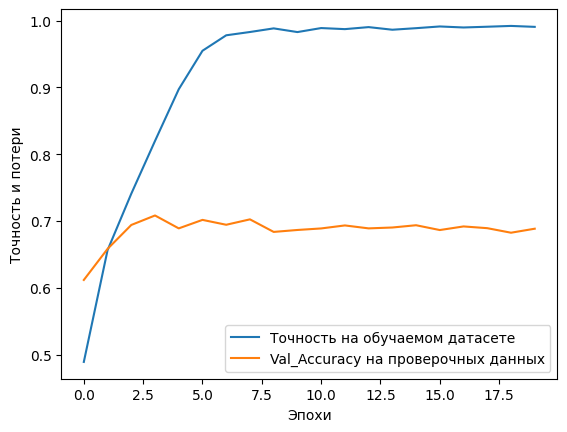

In [ ]:
plt.plot(history.history['accuracy'],
         label='Точность на обучаемом датасете')
plt.plot(history.history['val_accuracy'],
         label='Val_Accuracy на проверочных данных')
plt.xlabel('Эпохи')
plt.ylabel('Точность и потери')
plt.legend()
plt.show()

In [ ]:
x_test_cnn = x_test.reshape(x_test.shape[0], 32, 32, 3)

In [ ]:
x_test_cnn.shape

(10000, 32, 32, 3)

**Оцениваем точность**

In [ ]:
# оценим точность распознавания на тестовых данных
scores = model_CNN.evaluate(x_test_cnn, y_test, verbose=0)
print('\033[91m', "Распознование сверточной модели", round(scores[1] * 100, 4), "% корректных изображений")

 Распознование сверточной модели 68.5 % корректных изображений


**Делаем предикты**

Модель предсказала метку для каждого изображения в тестовом наборе.

In [ ]:
predictions = model_CNN.predict(x_test_cnn)

313/313 [==============================] - 1s 2ms/step


Давайте взглянем на первое предсказание:

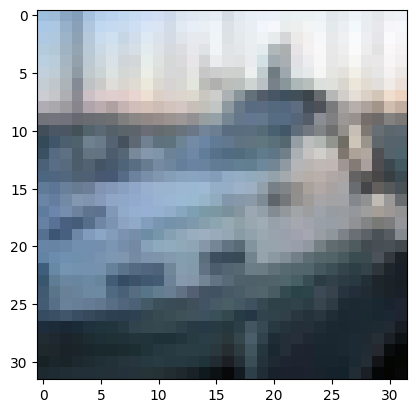

In [ ]:
# Меняйте значение n чтобы просмотреть результаты распознавания других изображений
n = 2
plt.imshow(x_test_cnn[n].reshape(32, 32, 3))
plt.show()

In [ ]:
print(predictions[n])

[3.6172126e-03 6.2878625e-03 1.6518672e-09 1.8601773e-04 1.1357834e-08
 5.5079250e-11 5.4078857e-15 9.1168282e-09 9.8985857e-01 5.0223854e-05]


Прогноз представляет собой массив из 10 чисел.

Они представляют собой "уверенность" модели в том, что изображение соответствует каждому из 10 различных предметов одежды.

Вы можете увидеть, какой метка имеет наибольшее значение достоверности:

In [ ]:
np.argmax(predictions[n])

8

In [ ]:
classes[np.argmax(predictions[n])]

'ship'

##шаг 13. Используйте обученную модель
**Загружаем свою картинку**


Finally, use the trained model to make a prediction about a single image.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving airplane.jpg to airplane.jpg


In [ ]:
# проверим наличие файла
!ls

model-cnn.h5  sample_data  yachta.jpeg


Преобразуем в формат 32 на 32


In [ ]:
img_path = 'airplane.jpg'
img = image.load_img(img_path, target_size=(32, 32)) # color_mode = "grayscale"

Покажем картинку


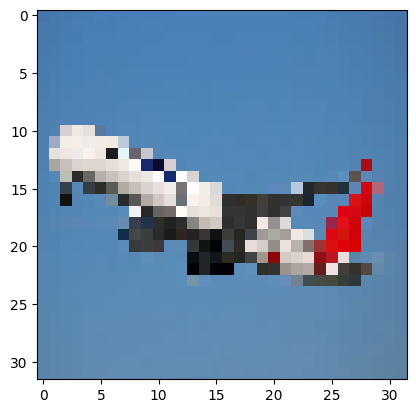

In [ ]:
plt.imshow(img.convert('RGBA'))
plt.show()

Преобразуем картинку для обработки нейронной сетью

In [ ]:
#Преобразуем картинку в массив
x=image.img_to_array(img)
#Меняем форму массива в плоский вектор
x=x.reshape(1, 32, 32, 3)
# Инвертируем изображение
#x=255-x
# Нормализуем изображение
x/=255


**A prediction result**


**Результат распознавания**

In [ ]:
prediction = model_CNN.predict(x)
print(prediction)
print('\033[91m', "Возможно, это", classes[np.argmax(prediction)]) # Escape-код ANSI (управление цветом), позволяющий найти максимум в последовательности "предсказание"

1/1 [==============================] - 0s 19ms/step
[[1.0000000e+00 3.0073483e-08 5.8713892e-24 9.1785157e-30 6.3909298e-18
  4.0321781e-29 6.7848292e-28 7.9067995e-36 9.3147962e-14 4.6112602e-12]]
 Возможно, это airplane


И модель предсказывает метку, как и ожидалось.

##Шаг №14. Сохраните модель.

**Сохраняем обученную сеть в файл**

**Сохранение всей модели в целом (конфигурация + вес)**

In [ ]:
model_CNN.save("my_best_model.h5")

In [ ]:
!ls

airplane.jpg  model-cnn.h5  my_best_model.h5  sample_data  yachta.jpeg


In [ ]:
# загрузим сохраненную модель
from keras.models import load_model
model_save = load_model("my_best_model.h5")

In [ ]:
#посмотрим на архитектуру загруженной модели
model_save.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 128)       0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense_8 (Dense)             (None, 512)               11076096  
                                                      

**Сохранение только весов**

In [ ]:
model_CNN.save_weights('my_model_weights.h5')

Какие у меня есть варианты сохранения моделей?
https://keras.io/getting_started/faq/#what-are-my-options-for-saving-models

##Шаг №15. Повысьте точность моделей

Как это можно сделать?

**Рекомендации:**

- Полезно понаблюдать, как повышается точность на тренировочных и тестовых наборах с увеличением количества эпох.
- Второе улучшение заключается в добавлении дополнительного слоя в нашу сеть.
- Измените количество нейронов (10, 50) в линейный слоях.
- Измените количество фильтров (8, 16, 32, 64, 128, 256) в сверточных слоях.
- Используйте выпадающие слои. Обратите внимание, что часто наблюдалось, что сети со случайным выпадением во внутренних скрытых слоях могут лучше обобщать невидимые примеры, содержащиеся в наборах тестов.
- Используйте BatchNormalization слови
- Используйте MaxPooling layers in сверточный слови.

**Следи за переобучением модели**

- Подготовьте отчет о своем исследовании.

*******************************************************************************************

### Задание
Добейтесь улучшения точности модели, используя следующие подходы:
- изменить число нейронов (10, 50);
- добавить один дополнительный слой;
- увеличить число эпох (контролируйте изменение точности);
- изменить параметр batch_size (32, 64).

Сделайте выводы.